## About Dataset

It is taken from Kaggle. It contains records of a direct marketing campaign of a Portuguese banking institution. The marketing campaign was executed through phone calls.

The goal of this project is to find the best strategies to improve for the next marketing campaign so that the financial institution have a greater effectiveness for future marketing campaigns. We will analyze the last marketing campaign the bank performed and identify the patterns that will help us find conclusions in order to develop future strategies.

## Problem Statement

To predict if the client will subscribe (yes/no) to the term deposit.

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Import Dataset

In [3]:
df = pd.read_excel(r"C:\Users\dell\Downloads\Bank Data.xlsx")
df.head()

,Age,Job,Marital Status,Education,Default,Balance,Housing,Loan,Contact,Duration,Subscribed?
0,27,student,single,secondary,no,91,no,no,telephone,157,no
1,38,services,married,secondary,no,5000,no,no,cellular,720,no
2,39,management,married,tertiary,no,481,no,no,cellular,929,yes
3,61,management,married,tertiary,no,0,yes,yes,cellular,85,no
4,31,admin.,married,secondary,no,389,yes,no,cellular,69,no


## Checking Insights

In [21]:
df.shape

(686, 11)

In [22]:
df.size

7546

In [23]:
df.describe()

,Age,Balance,Duration
count,686.000000,686.000000,686.000000
mean,44.881924,1849.259475,288.088921
std,15.993495,4223.024211,223.050044
min,18.000000,-32.000000,7.000000
25%,32.000000,230.000000,142.250000
50%,40.000000,712.000000,223.000000
75%,57.000000,2079.250000,366.750000
max,92.000000,81204.000000,2062.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             686 non-null    int64 
 1   Job             682 non-null    object
 2   Marital Status  686 non-null    object
 3   Education       652 non-null    object
 4   Default         686 non-null    object
 5   Balance         686 non-null    int64 
 6   Housing         686 non-null    object
 7   Loan            686 non-null    object
 8   Contact         677 non-null    object
 9   Duration        686 non-null    int64 
 10  Subscribed?     686 non-null    object
dtypes: int64(3), object(8)
memory usage: 59.1+ KB


In [25]:
df.columns

Index(['Age', 'Job', 'Marital Status', 'Education', 'Default', 'Balance',
       'Housing', 'Loan', 'Contact', 'Duration', 'Subscribed?'],
      dtype='object')

### What do columns indicate?

1. Age: Age of the client (numeric)
2. Job: Type of job (categorical)
3. Marital Status: Marital status of client (categorical)
4. Education: Education level (categorical)
5. Default: Has credit in default? (categorical)
6. Balance: Current balance in the account (numeric)
7. Housing: Has housing loan? (categorical)
8. Loan: Has personal loan? (categorical)
9. Contact: How the client was contacted? (categorical)
10. Duration: Last contact duration in seconds (numeric)
11. Subscribed?: Has the client subscribed a term deposit? (categorical)

## Removing Unnecessary Columns

In [4]:
df.drop(["Contact"], axis = 1, inplace = True)

In [28]:
df.shape

(686, 10)

## Checking null values

In [29]:
df.isnull().sum()

Age                0
Job                4
Marital Status     0
Education         34
Default            0
Balance            0
Housing            0
Loan               0
Duration           0
Subscribed?        0
dtype: int64

There are null values in columns - Job & Education.
Both these columns are categorical. Hence replace null values by modal value.

In [5]:
df["Job"].mode()

0    management
Name: Job, dtype: object

In [6]:
df["Job"].fillna("management", inplace = True)

In [7]:
df["Education"].mode()

0    secondary
Name: Education, dtype: object

In [8]:
df["Education"].fillna("secondary", inplace = True)

In [9]:
df.isnull().sum()

Age               0
Job               0
Marital Status    0
Education         0
Default           0
Balance           0
Housing           0
Loan              0
Duration          0
Subscribed?       0
dtype: int64

## Data Visualization

* ## Age distribution

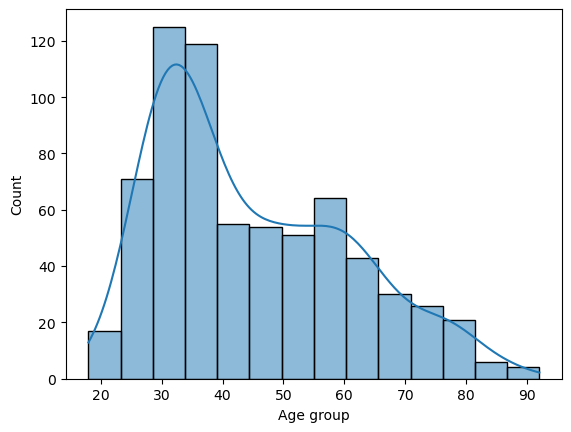

In [44]:
sns.histplot(df["Age"], kde = True)
plt.xlabel("Age group")
plt.ylabel("Count")
plt.show()

Most of the clients are from 30 to 40 age group.

* ## Job-wise distribution

In [37]:
a = df["Job"].value_counts().rename_axis("job").reset_index(name = "counts")
a.head()

,job,counts
0,management,153
1,retired,124
2,admin.,102
3,technician,102
4,blue-collar,55


<Figure size 500x500 with 0 Axes>

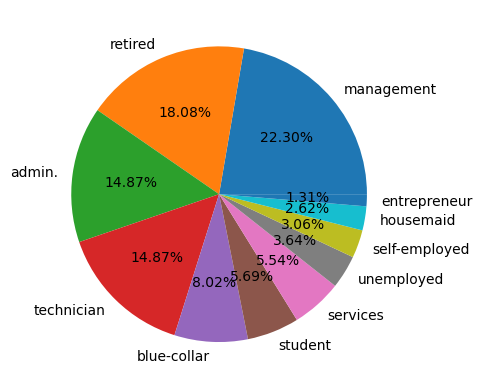

<Figure size 500x500 with 0 Axes>

In [52]:
labels = a["job"]
values = a["counts"]

plt.pie(values, labels = labels, autopct='%1.2f%%')
plt.figure(figsize=(5,5))

More than 50% of the clients are from Management and administration field, retired personnels and technicians.

* ## Relation between education and marital status

<AxesSubplot:xlabel='Education', ylabel='count'>

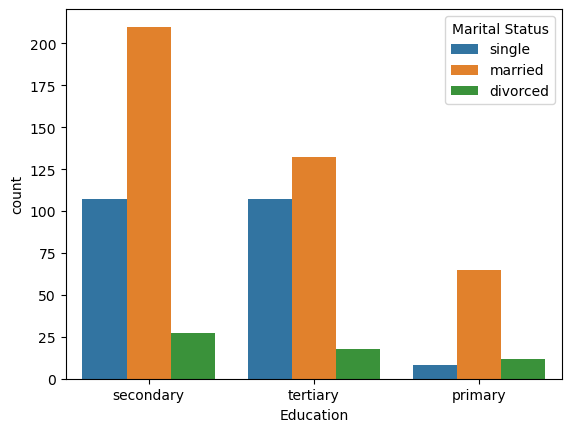

In [53]:
sns.countplot(df["Education"], hue = df["Marital Status"])

Most of the clients have completed secondary education. The percentage of married people are highest in all the three categories.

* ## Effect of education on subscription rate

<AxesSubplot:xlabel='Education', ylabel='count'>

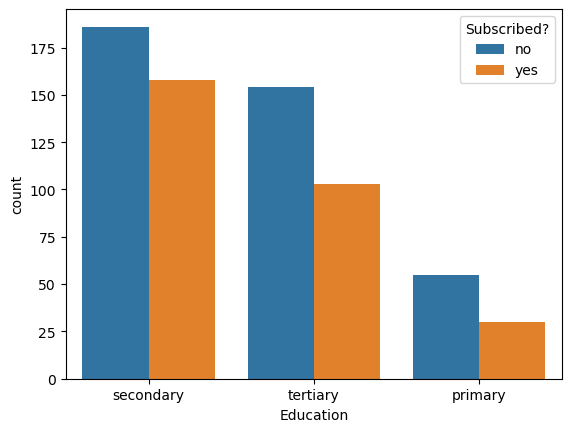

In [34]:
sns.countplot(df["Education"], hue = df["Subscribed?"])

Educated people tend to subscribe to term deposit. Most of them have completed secondory education.

* ## Effect of marital status on subscription rate

<AxesSubplot:xlabel='Marital Status', ylabel='count'>

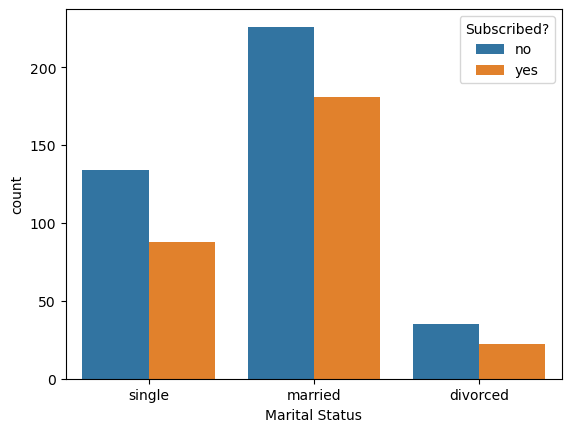

In [35]:
sns.countplot(df["Marital Status"], hue = df["Subscribed?"])

Married people tend to subscribe to term deposit.

* ## Balance distribution

<AxesSubplot:xlabel='Balance', ylabel='Density'>

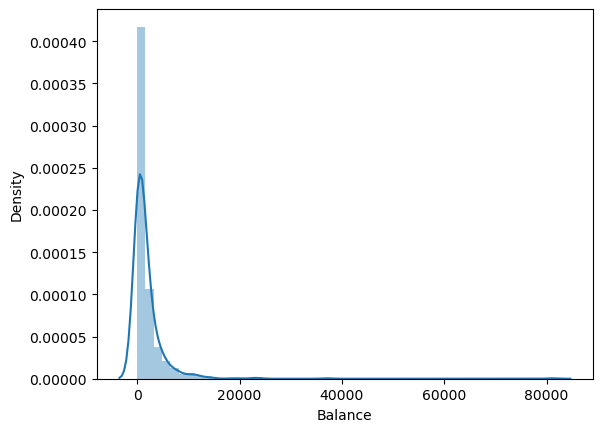

In [56]:
sns.distplot(df["Balance"])

The distribution plot for balance shows that data is skewed to right. Most of the clients have balance below 15000.

* ## Relation among age, balance, duration and subscription

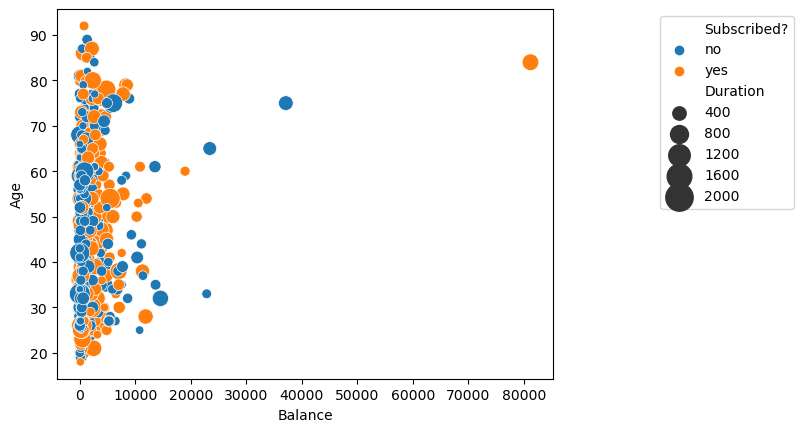

In [66]:
sns.scatterplot(df["Balance"], df["Age"], size = df["Duration"], hue = df["Subscribed?"], sizes = (20,400))
plt.legend(bbox_to_anchor=(1.5,1))

This bubble chart shows that most of the clients have balance below 10000, though there are some outliers. The age group to be targeted should be 20 to 60 years as these clients tend to subscribe to a term deposit. The size of the bubble shows duration of the last call in seconds. This chart shows that the duration of call doesn't affect subscription rate.

* ##  Distribution of duration

<AxesSubplot:xlabel='Duration'>

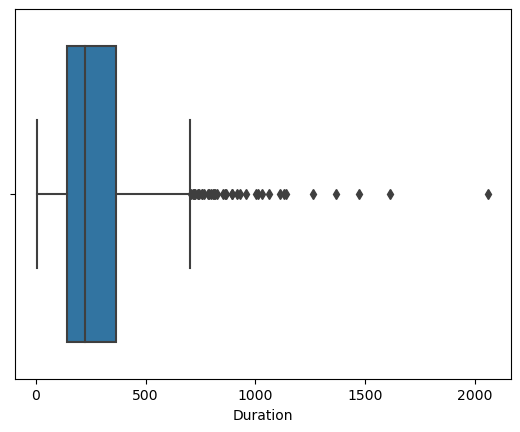

In [40]:
sns.boxplot(df["Duration"])

There are outliers in duration. The central tendency lies around 300 seconds.

* ## Subscription rate

<AxesSubplot:xlabel='count', ylabel='Subscribed?'>

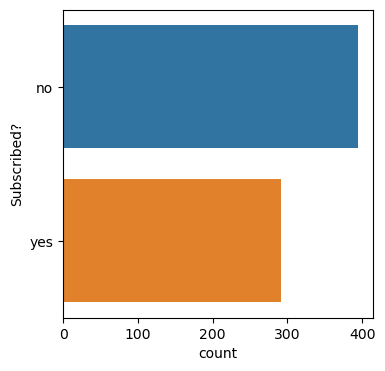

In [22]:
plt.figure(figsize=(4,4))
sns.countplot(y = df["Subscribed?"])

Less than 50% clients have subscribed to term deposit.

* ## Does housing loan affect subscription rate?

<AxesSubplot:xlabel='Housing', ylabel='count'>

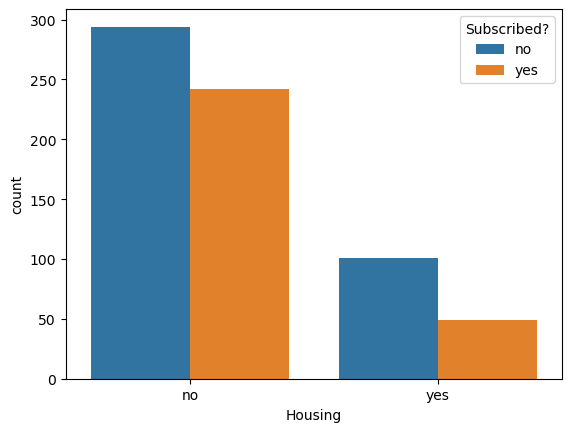

In [24]:
sns.countplot(df["Housing"], hue = df["Subscribed?"])

Clients having no housing loan have high subscription rate. 

* ## Does personal loan affect subscription rate?

<AxesSubplot:xlabel='Loan', ylabel='count'>

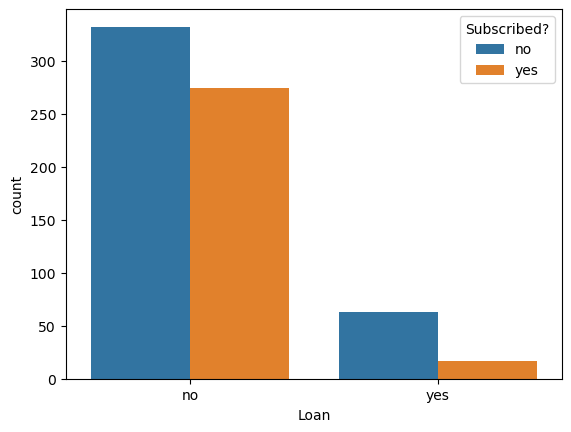

In [25]:
sns.countplot(df["Loan"], hue = df["Subscribed?"])

Clients having no loans subscribe to term deposit.

* ## How does job affect subscription rate?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'student'),
  Text(1, 0, 'services'),
  Text(2, 0, 'management'),
  Text(3, 0, 'admin.'),
  Text(4, 0, 'retired'),
  Text(5, 0, 'technician'),
  Text(6, 0, 'self-employed'),
  Text(7, 0, 'blue-collar'),
  Text(8, 0, 'entrepreneur'),
  Text(9, 0, 'unemployed'),
  Text(10, 0, 'housemaid')])

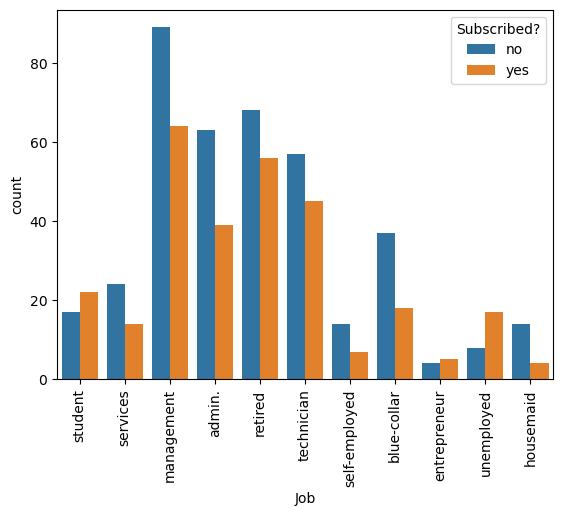

In [27]:
sns.countplot(df["Job"], hue = df["Subscribed?"])
plt.xticks(rotation=90)

Subscription rate is high amongst management, retired and technicians.

## Conclusion

* Subscribers are mostly between 20 to 60 years of age group.
* Subscribers are mostly from management & administrative field, and retired personnels & technicians.
* The subcription is high amongst married people.
* Educated people prefer subscription to term deposit.
* Subscribers are mostly those who do not have loans.

Thus, the term deposit should be pitched to married people between 20 to 60 years of age group, who are educated managers, technicians, retired personnels and administrators having no loans. 